In [172]:
# Import management
from importlib import reload

import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Services
import services.ModelStageService as sds

# utils
import utils.EDAUtils as edaUtils
import utils.ModelTrainingAndEvaluationUtils as mteUtils
import utils.DataTransformationUtils as dtUtils
import utils.PlottingUtils as pltUtils

reload(sds)
reload(edaUtils)
reload(mteUtils)
reload(dtUtils)
reload(pltUtils)

stage_data_io_service = sds.ModelStageService(previous_stage_name=sds.FEATURE_ENGINEERING_STAGE, current_stage_name=sds.MODEL_BUILDING_AND_EVALUATING_STAGE)

In [133]:
# Loading previous stage data
X_train, X_test, Y_train, Y_test = stage_data_io_service.run_or_load_stage_data(reload_stage=False)

print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ', Y_train.shape)
print('y_test shape : ', Y_test.shape)

Reload stage False path ../../data/stages/FEATURE_ENGINEERING_stage_data.pkl exists True
Loading FEATURE_ENGINEERING from snapshot.
Loading FEATURE_ENGINEERING from snapshot.
X_train shape :  (16990, 18)
X_test shape :  (137184, 18)
y_train shape :  (16990,)
y_test shape :  (137184,)


In [134]:
fraud_best_model, fraud_trained_all_models = mteUtils.load_or_tune_and_evaluate_models(
    'ftf_detector',
    mteUtils.models_dictionary,
    np.array(X_train, copy=True),
    np.array(X_test, copy=True),
    np.array(Y_train, copy=True),
    np.array(Y_test, copy=True),
    re_train=True
)

INFO:utils.ModelTrainingAndEvaluationUtils:------------------------------
Starting tuning for model: LogisticRegression
C:\Users\gorba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gorba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

Objects successfully serialized into ../../model/saved/ftf_detector\ftf_detector_best.pkl
Objects successfully serialized into ../../model/saved/ftf_detector\ftf_detector_all.pkl


In [174]:
mteUtils.evaluate_models(fraud_trained_all_models, np.array(Y_test, copy=True))

Model Name           Accuracy   ROC AUC    Precision  Recall     F1 Score  
LogisticRegression   0.67       0.65       0.03       0.62       0.06      
GaussianNB           0.76       0.62       0.03       0.47       0.06      
KNeighborsClassifier 0.58       0.57       0.02       0.56       0.04      
RandomForest         0.72       0.72       0.04       0.72       0.07      
DecisionTreeClassifier 0.69       0.68       0.03       0.67       0.06      


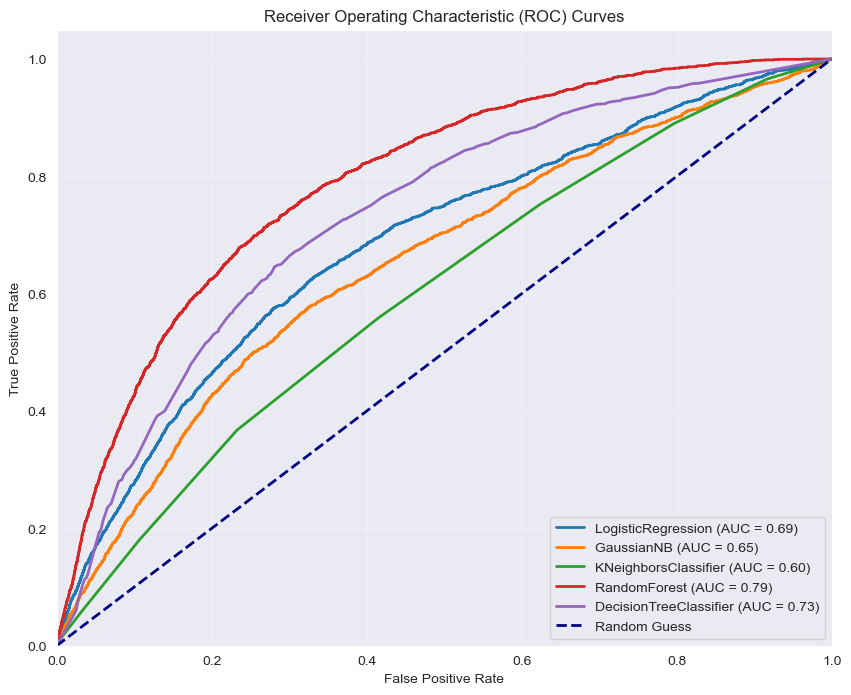

In [135]:
pltUtils.plot_roc_curves(fraud_trained_all_models, np.array(X_test, copy=True), np.array(Y_test, copy=True))

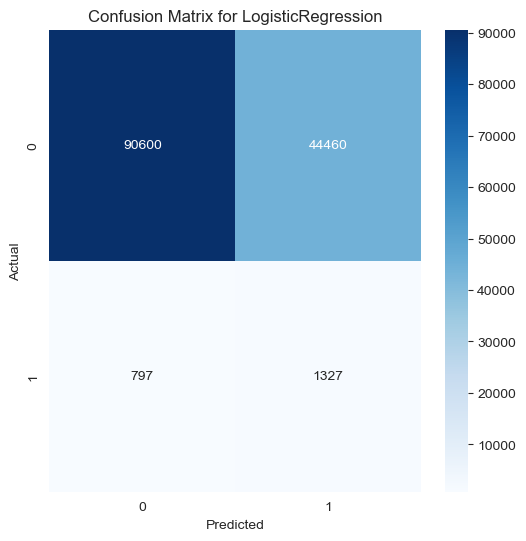

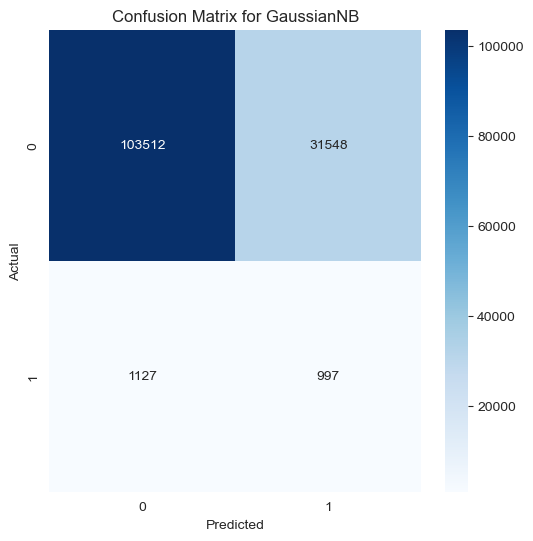

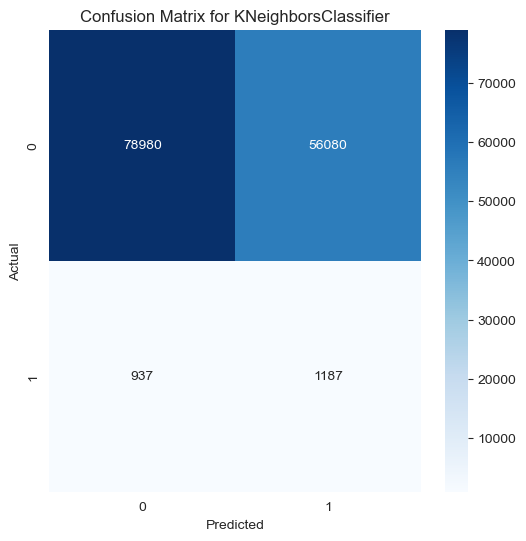

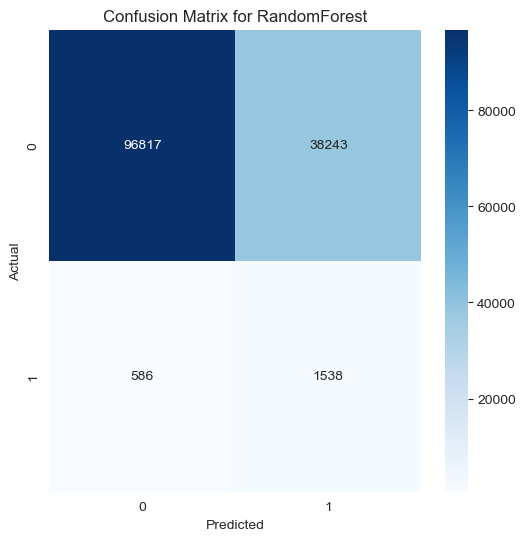

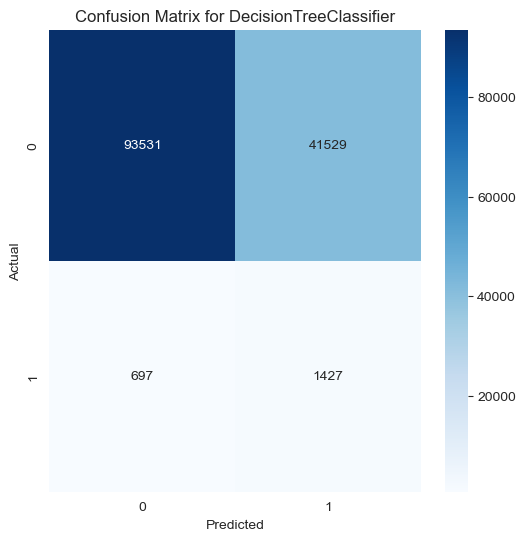

In [171]:
pltUtils.plot_confusion_matrix_models(models=fraud_trained_all_models, X_test=np.array(X_test, copy=True), Y_test=np.array(Y_test, copy=True))

The model 'LogisticRegression' does not support feature importance plotting.
The model 'GaussianNB' does not support feature importance plotting.
The model 'KNeighborsClassifier' does not support feature importance plotting.


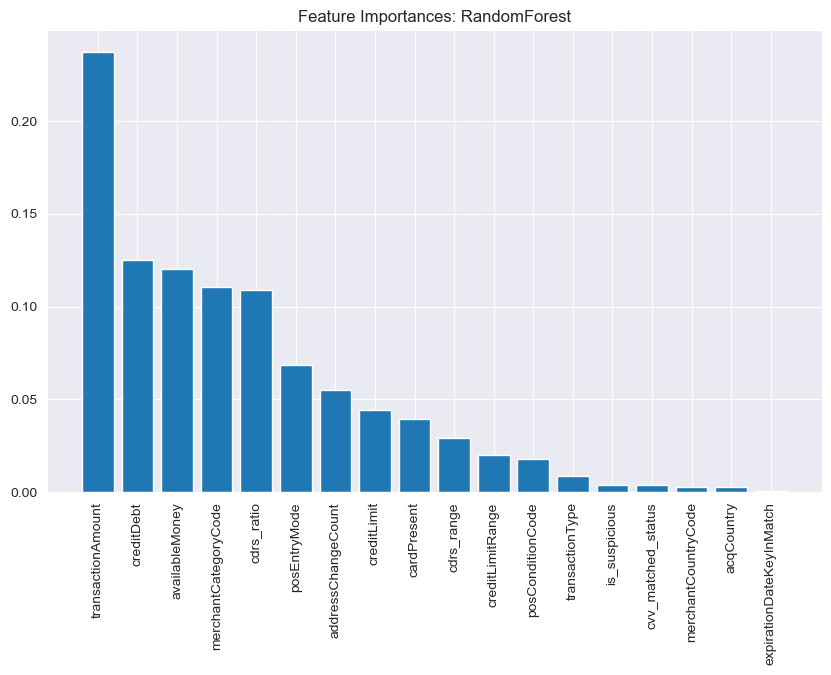

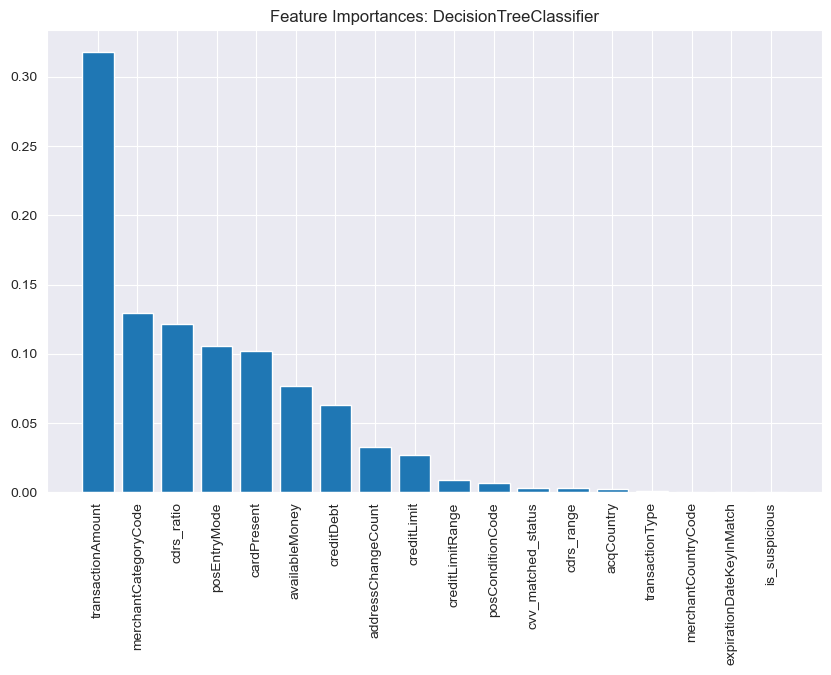

In [144]:
pltUtils.plot_feature_importances(models=fraud_trained_all_models, feature_names=list(X_test.columns))